- **Summarizing and manipulating data**:
  * How large is it?
  * What columns are of interest?
  * What are the characteristics of the data derived from summary statistics and counts?
- **Developing multiple views of complex data** using multiple chart types. Exploring complex data requires multiple views to understand the many relationships. It is impossible to develop a complete understanding from just a few plots.
- **Matplotlib, Pandas plotting and Seaborn** which are commonly used Python plotting packages. 
- **Using univariate plot types** is a review of creating these basic plots using three Python packages. These plot types allow you to study the distributional properties of the variables in your data set. 
- **Using two dimensional plot types** is a review of creating basic plot types used to construct visualizations. These plots naturally display the relationship between two variables on the 2-d computer graphics display. 
- **Using Aesthetics** is an overview of how to project additional plot dimensions using plot aesthetics. Using aesthetics provides a method for projecting additional dimensions onto the 2-d computer graphics display. 
- **Facetted plotting** also know as conditioned plotting or lattice plotting, introduces a powerful method for visualizing higher dimensional data. Arrays of plots of subsets of the data are arranged on the 2-d computer graphics display. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [31]:
auto_prices = pd.read_csv('Automobile price data _Raw_.csv')

def clean_auto_data(auto_prices):
    # Record names. Fix column names so the '-' character becomes '_'
    cols = auto_prices.columns
    print(type(cols))
    auto_prices.columns = [x.replace('-', '_') for x in cols]
    
    # Treat missing values. Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']
    for col in cols:
        auto_prices[auto_prices[col] == '?'] = np.nan
    auto_prices.dropna(axis=0, inplace=True)
    
    # Transform column data type. Convert some columns to numeric values
    for col in cols:
        auto_prices[col] = pd.to_numeric(auto_prices[col])
        
    return auto_prices
'''
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for col in cols:
    print(auto_prices[col].dtypes)
    print(auto_prices[col].unique())
'''

auto_prices = clean_auto_data(auto_prices)
print(auto_prices.columns)

'''
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']
for col in cols:
    print(auto_prices[col].unique())
'''

<class 'pandas.core.indexes.base.Index'>
Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


"\ncols = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']\nfor col in cols:\n    print(auto_prices[col].unique())\n"

In [32]:
## Exploring the data
auto_prices.head()
auto_prices.dtypes
# Numeric columns
auto_prices.describe().round(3)

symboling  wheel_base   length    width   height  curb_weight  \
count    195.000     195.000  195.000  195.000  195.000      195.000   
mean       0.795      98.896  174.257   65.886   53.862     2559.000   
std        1.231       6.132   12.476    2.132    2.397      524.716   
min       -2.000      86.600  141.100   60.300   47.800     1488.000   
25%        0.000      94.500  166.300   64.050   52.000     2145.000   
50%        1.000      97.000  173.200   65.400   54.100     2414.000   
75%        2.000     102.400  184.050   66.900   55.650     2943.500   
max        3.000     120.900  208.100   72.000   59.800     4066.000   

       engine_size     bore   stroke  compression_ratio  horsepower  peak_rpm  \
count      195.000  195.000  195.000            195.000     195.000   195.000   
mean       127.938    3.329    3.250             10.195     103.272  5099.487   
std         41.434    0.272    0.314              4.062      37.870   468.271   
min         61.000    2.540    2.070              7.000      48.000  4150.000   
25%         98.000    3.150    3.110              8.500      70.000  4800.000   
50%        120.000    3.310    3.290              9.000      95.000  5100.000   
75%        145.500    3.590    3.410              9.400     116.000  5500.000   
max        326.000    3.940    4.170             23.000     262.000  6600.000   

       city_mpg  highway_mpg      price  
count   195.000      195.000    195.000  
mean     25.374       30.841  13248.015  
std       6.401        6.829   8056.330  
min      13.000       16.000   5118.000  
25%      19.500       25.000   7756.500  
50%      25.000       30.000  10245.000  
75%      30.000       35.000  16509.000  
max      49.000       54.000  45400.000

In [24]:
# Understand the distribution of categorical data. 
# Create the frequency table
def count_unique(auto_prices, cols):
    for col in cols:
        print(auto_prices[col].value_counts())

cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 
            'fuel_system']
count_unique(auto_prices, cols)

toyota           32
nissan           18
mitsubishi       13
mazda            13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
chevrolet         3
jaguar            3
isuzu             2
mercury           1
Name: make, dtype: int64
gas       175
diesel     20
Name: fuel_type, dtype: int64
std      159
turbo     36
Name: aspiration, dtype: int64
four    112
two      81
?         2
Name: num_of_doors, dtype: int64
sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64
fwd    116
rwd     71
4wd      8
Name: drive_wheels, dtype: int64
front    192
rear       3
Name: engine_location, dtype: int64
ohc     143
ohcf     15
ohcv     13
dohc     12
l        12
Name: engine_type, dtype: int64
four      155
six        24
fi

There are some basic facts you can derive from these frequency tables. 
1. Some of these variables have a large number of categories. When performing machine learning with a limited size training dataset, having a large number of categories is problematic, since there will be few samples per category. For example, notice how many auto makes are represented. There is only 1 Mercury and 2 Isuzus. Thus, any statistical property for these categories will be poorly determined. 
2. There are significant imbalances in the counts of some categories. You have already seen that there are significant differences in the counts of autos by make. As another example, there are only 3 cars with rear engine autos. Again, any statistical property of rear engine cars will be poorly determined.
3. Some categorical variables could reasonably converted to numeric variables. For example, the number of cylinders is currently a categorical variable, but could be transformed to a numeric variable. 

***
**Note:** There are two other cases to consider with the transformations between numeric and categorical variables.
1. Some categorical variables indicate rank, for example large, medium and small. In these cases, it may be better to transform these values to numeric levels.
2. Just as it might be useful to transform a categorical variable to numeric, it may be advantageous to convert a numeric variable to a categorical variable. This is particularly the case if the numeric values are simply coding for a category with no particular meaning.  
***

## Visualizing Automobile Data for Regression
### Visualizing distributions
Since Pandas plotting is built on Matplotlib, it is always possible to add additional plot attributes using methods in this package.

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


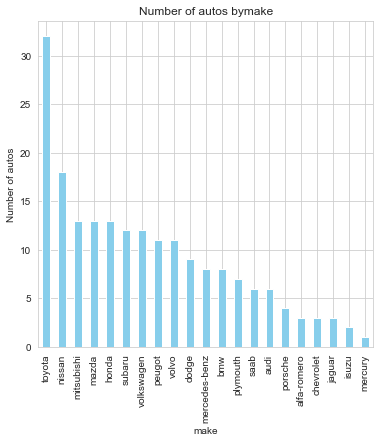

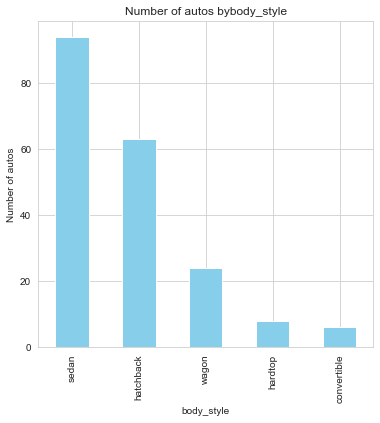

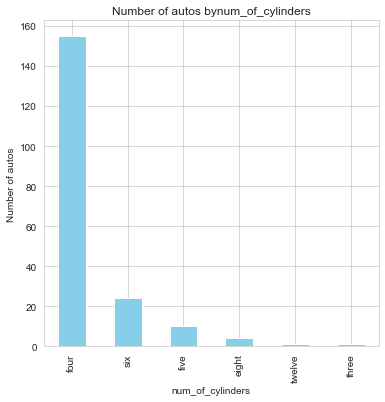

In [46]:
## Use Bar Charts to examine the frequency distributions of categorical variables (Pandas plotting method)
def plot_bar(auto_prices, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6))  # define a plot area
        ax = fig.gca()  # define axis
        counts = auto_prices[col].value_counts()  # find the counts for each unique category
        print(type(counts))
        counts.plot.bar(ax=ax, color='skyblue')  # Use the Pandas plot.bar() method to create bar chats
        ax.set_title('Number of autos by' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of autos')
        
plot_cols = ['make', 'body_style', 'num_of_cylinders']
plot_bar(auto_prices, plot_cols)

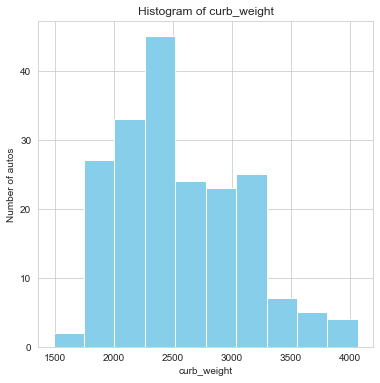

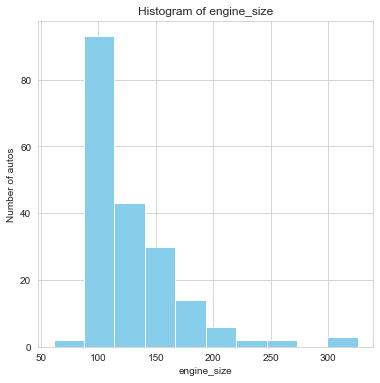

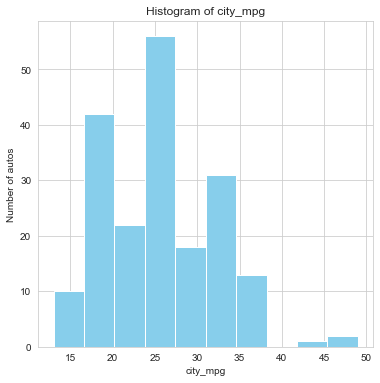

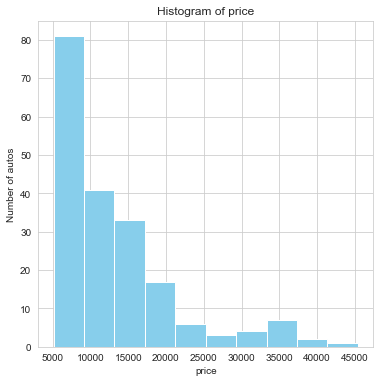

In [47]:
## Use Histogram shows the number of data values within a bin for a numeric variable (Pandas plotting method)
def plot_hist(auto_prices, cols, bins=10):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        auto_prices[col].plot.hist(ax=ax, bins=bins, color='skyblue')  # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of autos')
        plt.show()
        
num_cols = ['curb_weight', 'engine_size', 'city_mpg', 'price']
plot_hist(auto_prices, num_cols, bins=10)

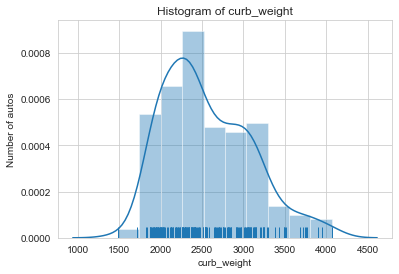

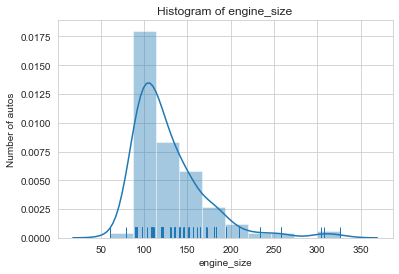

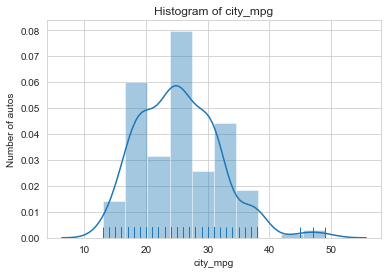

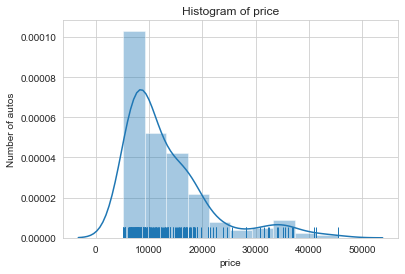

In [41]:
## Kernel density plots (Seaborn)
# Kernel density estimation or kde plots are similar in concept to a histogram. 
# A kernel density plot displays the values of a smoothed density curve of the data values. 
# In other words, the kernel density plot is a smoothed version of a histogram.
def plot_density_hist(auto_prices, cols, bins=10, hist=False):
    for col in cols:
        sns.set_style('whitegrid')
        sns.distplot(auto_prices[col], bins=bins, rug=True, hist=hist)
        plt.title('Histogram of ' + col)
        plt.xlabel(col)
        plt.ylabel('Number of autos')
        plt.show()

# plot_density_hist(auto_prices, num_cols)

# Combine histogram and kde
plot_density_hist(auto_prices, num_cols, hist=True)

### Two Dimensional Plot
Two dimensional plots help you develop an understanding  of the **relationship between two variables**. For machine learning, the relationship of greatest interest is between the **features** and the **label**. It can also be useful to examine the relationships between features to determine if the features are co-variate or not. Such a procedure can prove more reliable than simply computing correlation when the relationship is nonlinear. 

#### Relationship between numeric data

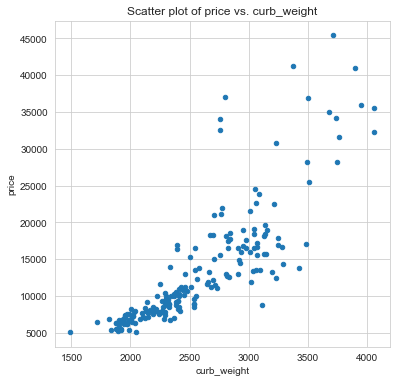

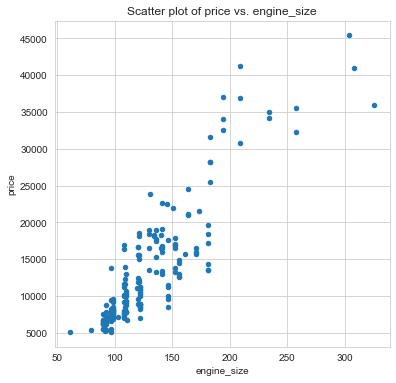

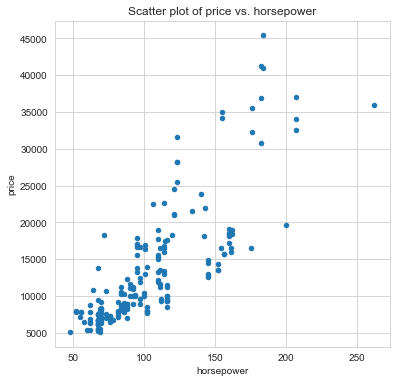

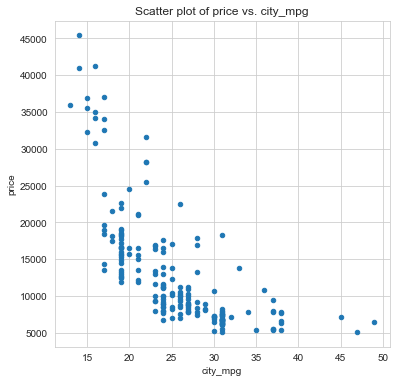

In [51]:
## Create a scatter plot (Pandas plotting method)
def plot_scatter(auto_prices, cols, col_y='price'):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        auto_prices.plot.scatter(ax=ax, x=col, y=col_y)  # Use plot.scatter() method
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel(col_y)
        plt.show()

num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter(auto_prices, num_cols)

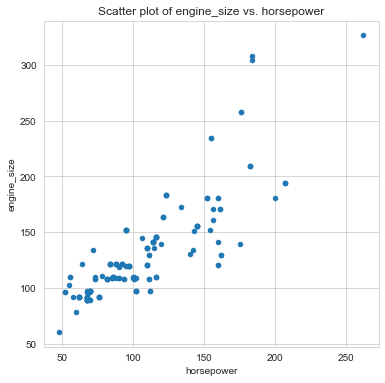

In [52]:
# horsepower and engine_size seem to be colinear
plot_scatter(auto_prices, ['horsepower'], 'engine_size') 
# Indeed these features do appear linearly dependent. 
# Therefore, you will not want to use them in the same machine learning model.

Examine the engine_size or city_mpg vs price above. Notice, that for certain engine sizes and city_mpg ratings there are numerous autos in a narrow price range. Apparently, auto manufactures target these characteristics. The result is that many points are plotted one over the other on the scatter plots, resulting in **over plotting**. Over plotting is a serious problem when scatter plots are applied to large datasets. Serious over plotting can render a plot meaningless or uninterpretable. 

Fortunately, there are several good ways to deal with over plotting:
1. Use **transparency** of the points to allow the view to see though points. With mild over plotting this approach can be quite effective.
2. **Countour plots** or **2d density plots** show the density of points, much as a topographic map shows elevation. Generating the contours has high computational complexity and making this method unsuitable for massive datasets.
3. **Hexbin plots** are the two-dimensional analog of a histogram. The density of the shading in the hexagonal cells indicates the density of points. Generating hexbins is computationally efficient and can be applied to massive datasets.

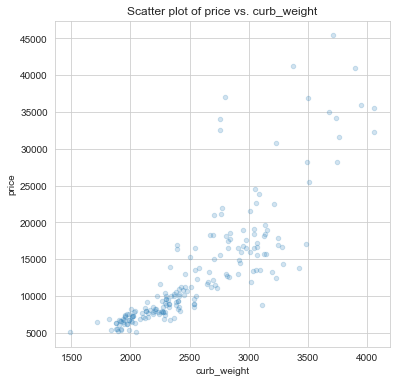

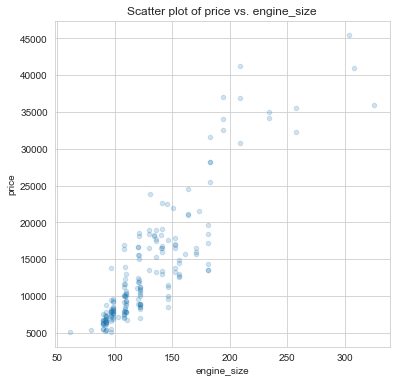

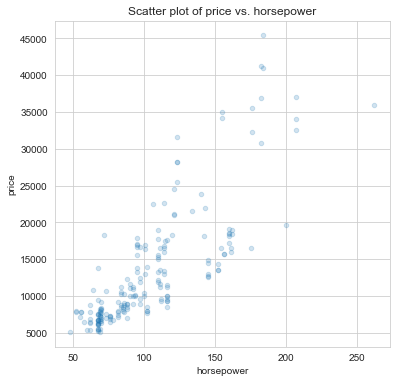

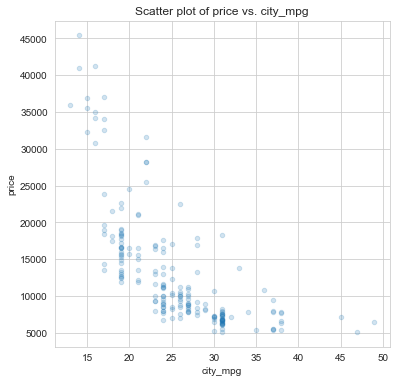

In [54]:
# Deal with overplotting with transparency (Pandas plotting method)
def plot_scatter_transparency(auto_prices, cols, col_y='price', alpha=1.0):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        auto_prices.plot.scatter(ax=ax, x=col, y=col_y, alpha=alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_scatter_transparency(auto_prices, num_cols, alpha=0.2)

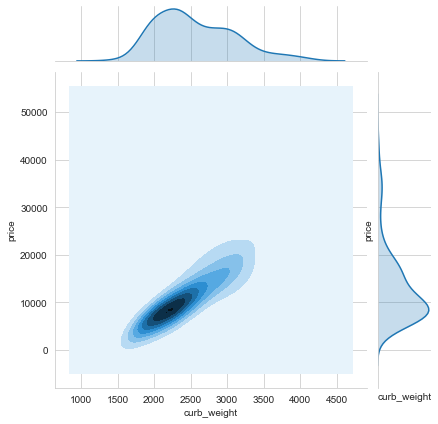

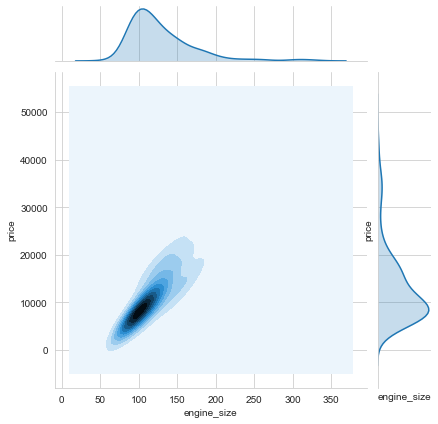

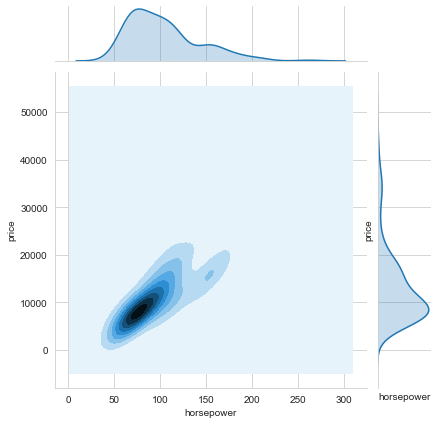

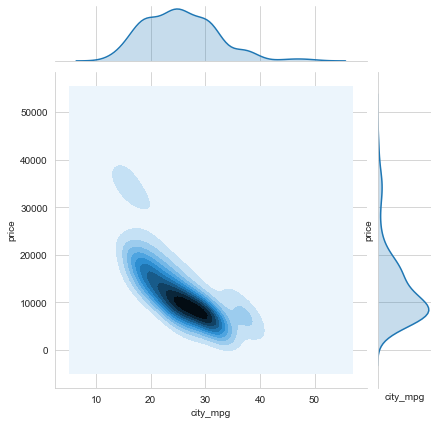

In [56]:
# Deal with overplotting 2d density plots (Seaborn)
# This plots displays 1d KDE plots along with the countour plot showing 2d density
def plot_density_2d(auto_prices, cols, col_y='price', kind='kde'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.jointplot(x=col, y=col_y, data=auto_prices, kind=kind)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
    
plot_density_2d(auto_prices, num_cols)

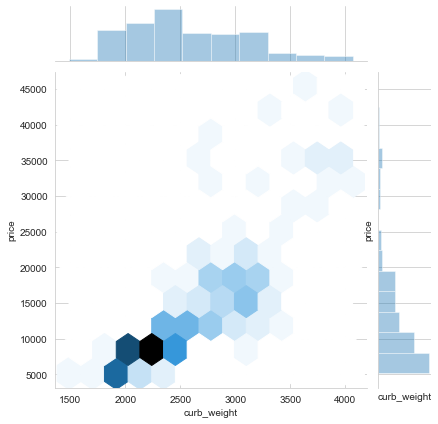

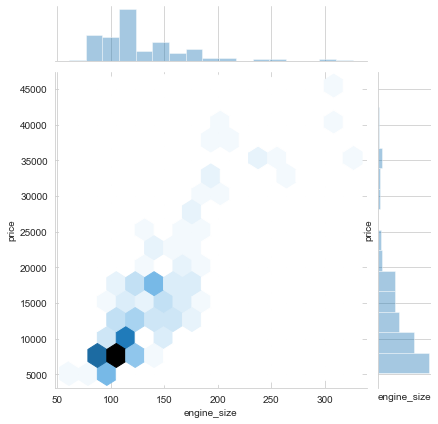

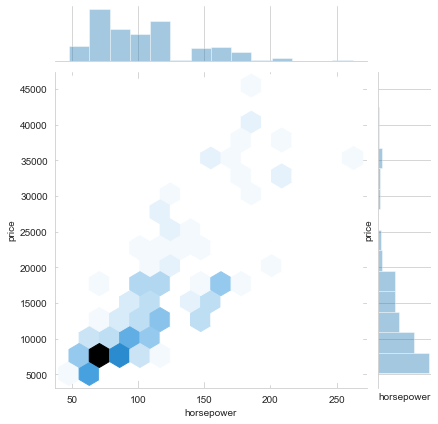

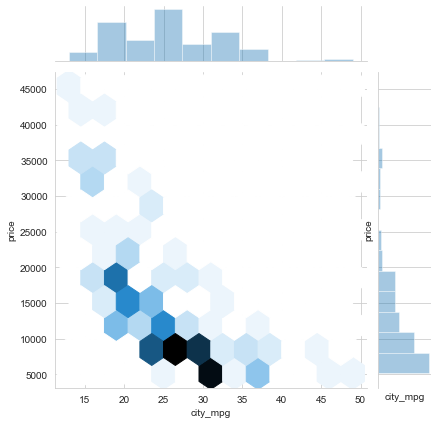

In [58]:
# Displays the 2d hexbin plots and 1d histograms for the same variables
plot_density_2d(auto_prices, num_cols, kind = 'hex') 

#### Relation between categorical and numeric variables
Previousely, 2d plots are for numeric variables But, what can you do if some of the features are categorical variables? Box plots of violin plots can be arranged side by side with data of the numerical variable grouped by the categories of the categorical variable. In this way each box or violin display represents the value of the numeric variable for cases of each category of the categorical variable.
1. **Box plots** which highlight the quartiles of a distribution. Not surprisingly, the box plot contains a box. The range of the **inner two quartiles** are contained within the box. The lenght of the box shows the **interquartile range**. A line within the box shows the median. **Wiskers** extend for the maximum of 1.5 times the interquartile range or the extreme value of the data. Outliers beyond the wiskers are shown in a symbol. 
2. **Violine plots** which are a variation on the 1d KDE plot. Two back to back KDE curves are used to show the density estimate. 



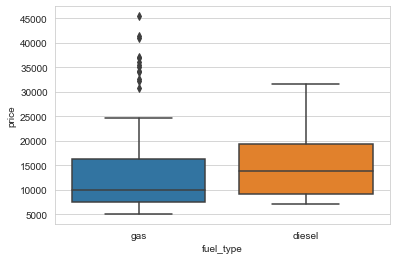

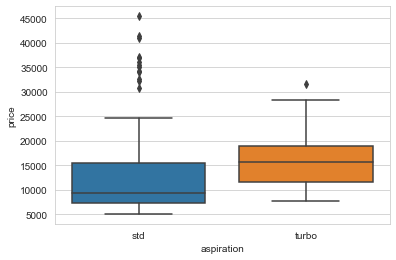

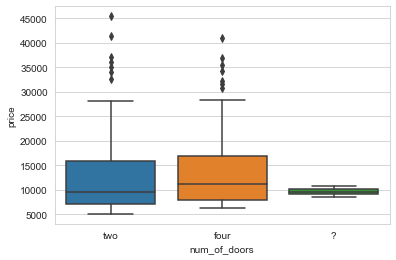

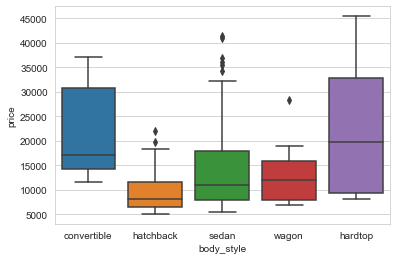

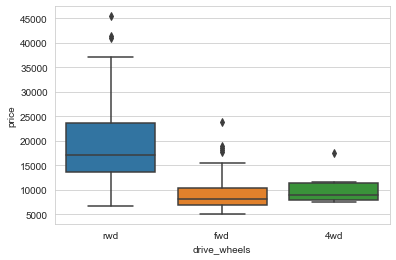

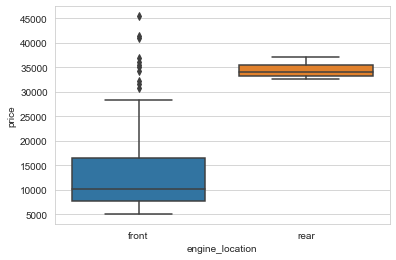

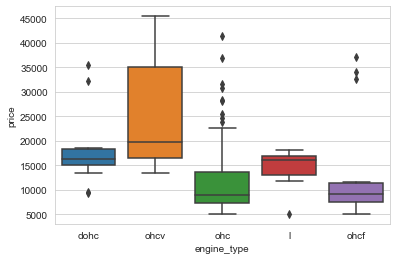

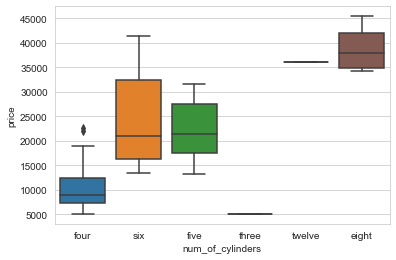

In [60]:
# Build Box Plot (Seaborn)
def plot_box(auto_prices, cols, col_y='price'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(x=col, y=col_y, data=auto_prices)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
        
cat_cols = ['fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders']
plot_box(auto_prices, cat_cols)

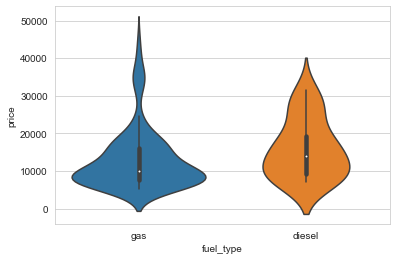

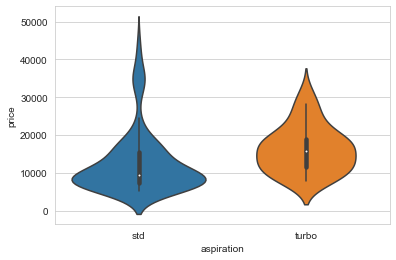

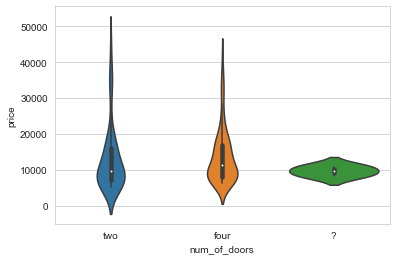

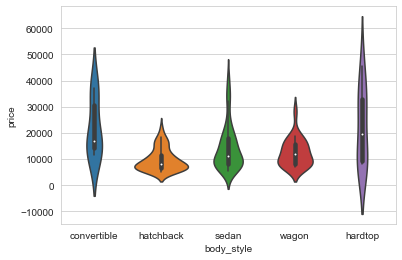

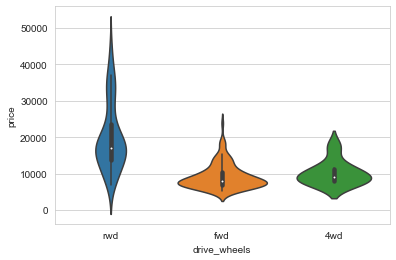

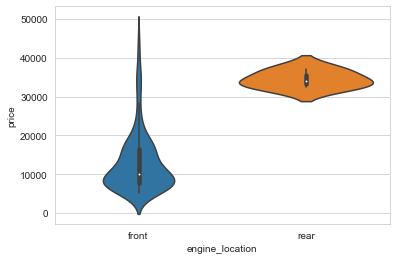

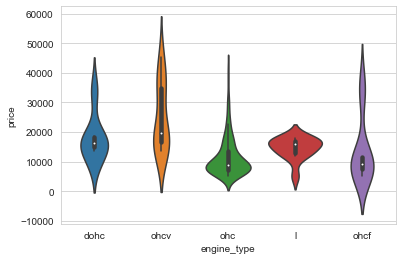

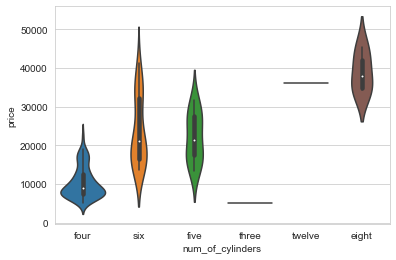

In [61]:
# Build Violin Plot (Seaborn)
def plot_violin(auto_prices, cols, col_y='price'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.violinplot(x=col, y=col_y, data=auto_prices)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
    
plot_violin(auto_prices, cat_cols)

### Use aesthetics to add project additional dimensions

Previously, a single plot contains one or two variables on. But, with complex datasets it is useful to view multiple dimensions on each plot. Plot aesthetics are used to project additional dimensions. Some aesthetics are useful only for categorical variables, while others are useful for numeric variables. Keep in mind that not all plot aesthetics are equally effective. Tests of human perceptions have shown that people are very good as noticing small differences in position. This fact explains why scatter plots are so effective. In rough order of effectiveness these aesthetics are:
1. **Marker shape** is an effective indicator variable category. It is critical to select shapes which are easily distinguished by the viewer. 
2. **Marker size** shows values of a numeric variable. Be careful, as size is the span across the marker, not the area. 
3. **Marker color** is useful as an indicator of variable category. Color is the least effective of these three aesthetics in terms of human perception. Colors should be chosen to appear distinct. Additionally, keep in mind that many people, particularly men are red-green color blind. 

Categorical aesthetics, such as marker shape and color, are only effective if the differences in markers are perceptable. Using too many shapes or color creates a situation where the viewer cannot tell the differences between the categories. Typically a limit of about five to seven categories should be observed. 

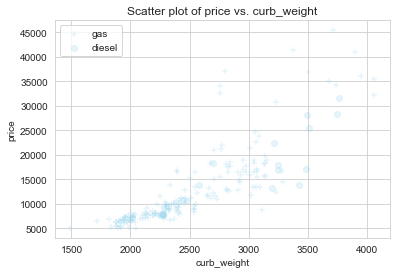

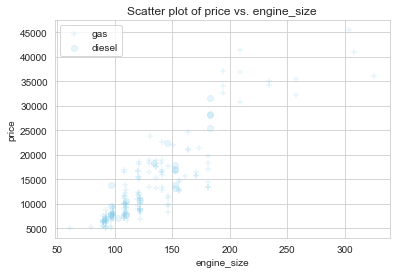

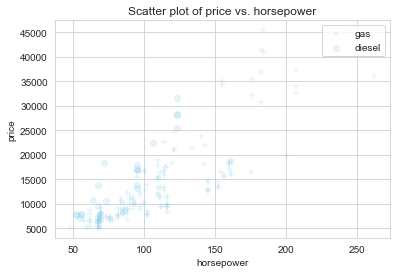

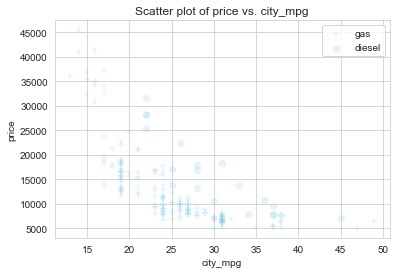

In [70]:
# Use Maker Shape combined with scatter plot with transparency (Seaborn)
def plot_scatter_shape(auto_prices, cols, shape_col='fuel_type', col_y='price', alpha=0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = auto_prices[shape_col].unique()
    for col in cols:
        sns.set_style('whitegrid')
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = auto_prices[auto_prices[shape_col] == cat]
            sns.regplot(x=col, y=col_y, data=temp, marker=shapes[i], label=cat,
                       scatter_kws={'alpha':alpha}, fit_reg=False, color='skyblue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) 
        plt.xlabel(col)
        plt.ylabel(col_y)      
        plt.legend()
        plt.show()

num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter_shape(auto_prices, num_cols)

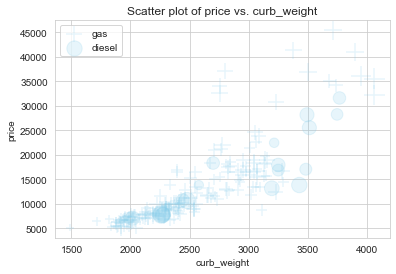

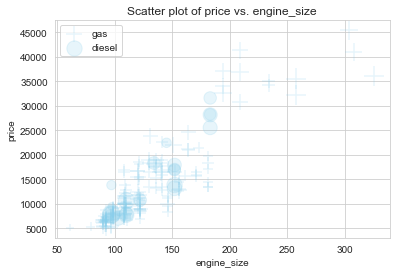

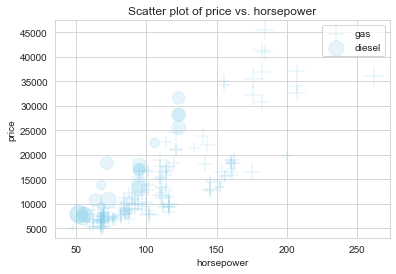

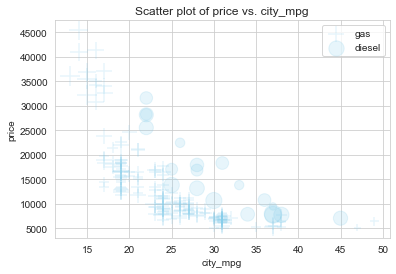

In [72]:
# Use Maker Size and Maker Shape combined with scatter plot with transparency (Seaborn)
def plot_scatter_size(auto_prices, cols, shape_col = 'fuel_type', size_col = 'curb_weight',
                            size_mul = 0.000025, col_y = 'price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = auto_prices[shape_col].unique()
    for col in cols:
        sns.set_style('whitegrid')
        for i, cat in enumerate(unique_cats):
            temp = auto_prices[auto_prices[shape_col] == cat]
            sns.regplot(x=col, y=col_y, data=temp, marker=shapes[i], label=cat,
                        scatter_kws={'alpha':alpha, 's':size_mul*auto_prices[size_col]**2}, 
                        fit_reg = False, color = 'skyblue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) 
        plt.xlabel(col)
        plt.ylabel(col_y)      
        plt.legend()
        plt.show()
        
plot_scatter_size(auto_prices, num_cols)

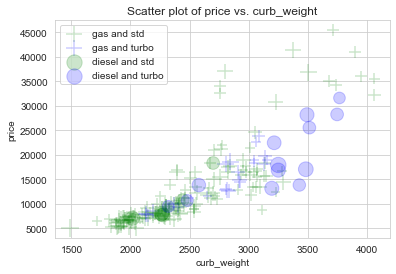

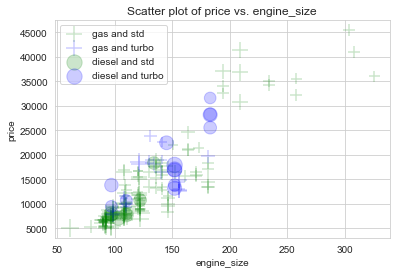

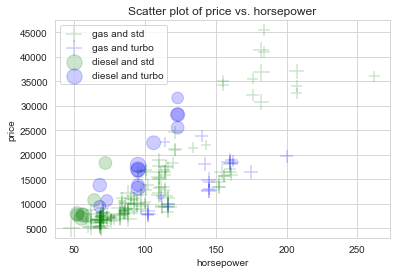

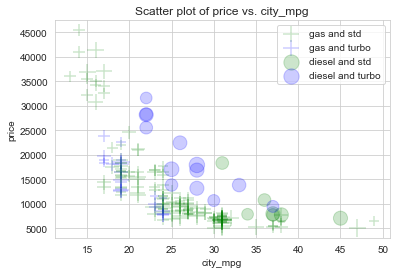

In [79]:
# Use Maker Size, Maker Shape, and Color combined with scatter plot with transparency (Seaborn)
def plot_scatter_shape_size_color(auto_prices, cols, shape_col = 'fuel_type', size_col = 'curb_weight',
                            size_mul = 0.000025, color_col = 'aspiration', col_y = 'price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    colors = ['green', 'blue', 'orange', 'magenta', 'gray'] # specify distinctive colors
    unique_cats = auto_prices[shape_col].unique()
    unique_colors = auto_prices[color_col].unique()
    for col in cols:
        sns.set_style('whitegrid')
        for i, cat in enumerate(unique_cats):
            for j, color in enumerate(unique_colors):
                temp = auto_prices[(auto_prices[shape_col] == cat) & 
                                  (auto_prices[color_col] == color)]
                sns.regplot(x=col, y=col_y, data=temp, marker=shapes[i], label = (cat + ' and ' + color),
                            scatter_kws={'alpha':alpha, 's':size_mul*auto_prices[size_col]**2}, 
                            fit_reg = False, color = colors[j])
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) 
        plt.xlabel(col)
        plt.ylabel(col_y)      
        plt.legend()
        plt.show()
        
plot_scatter_shape_size_color(auto_prices, num_cols)

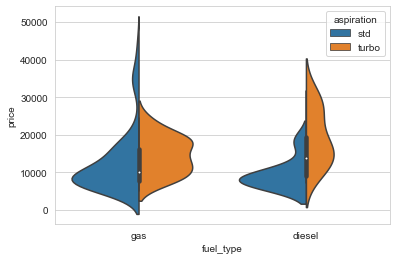

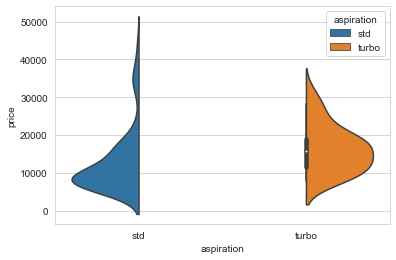

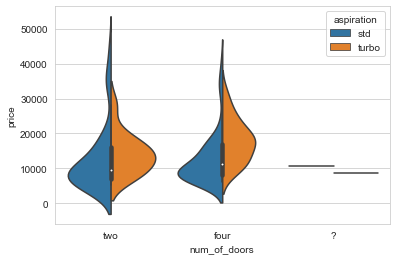

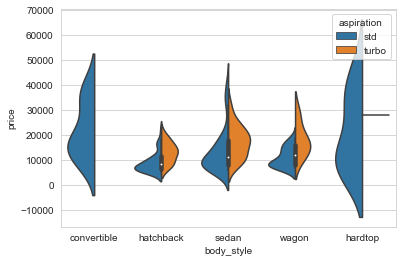

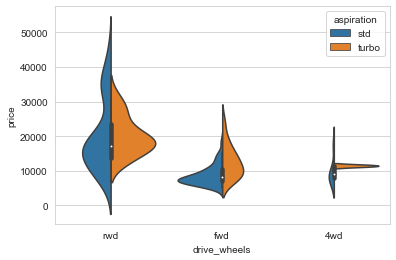

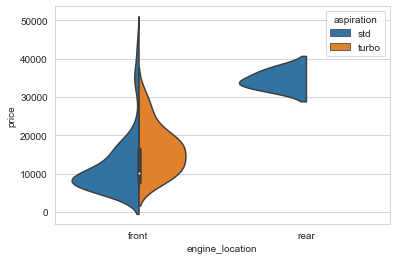

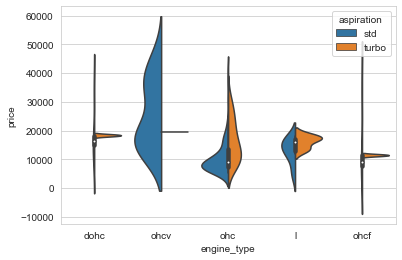

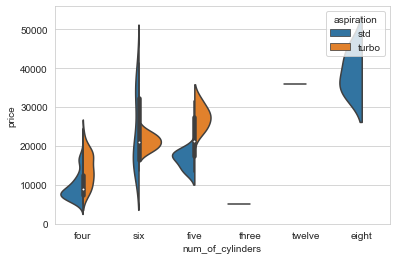

In [82]:
# Use Color/ Hue in other plots
def plot_violin_hue(auto_prices, cols, col_y = 'price', hue_col = 'aspiration'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.violinplot(x=col, y=col_y, data=auto_prices, hue=hue_col, split=True)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
        
plot_violin_hue(auto_prices, cat_cols)

### Multi-axis views of data

I have been working with plots with a single pair of axes. However, it is quite possible to create powerful data visualizations with multiple axes. These methods allows you to examine the relationships between many variables in one view. These multiple views aid in understanding of the many relationships in complex datasets. There are a number of powerful multi-axes plot methods. In this lab you will work with two commonly applied methods:
1. **Pair-wise scatter plots** or **scatter plot matrices** are an array of scatter plots with common axes along the rows and columns of the array. The diagonal of the array can be used to display distribution plots. The cells above or below the diagonal can be used for other plot types like contour density plots.
2. **Conditioned plots**, **facetted plots** or **small multiple plots** use **group-by** operations to create and display subsets of the dataset. The display can be a one or two dimensional array organized by the groupings of the dataset. 

/Users/futongli/opt/anaconda3/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


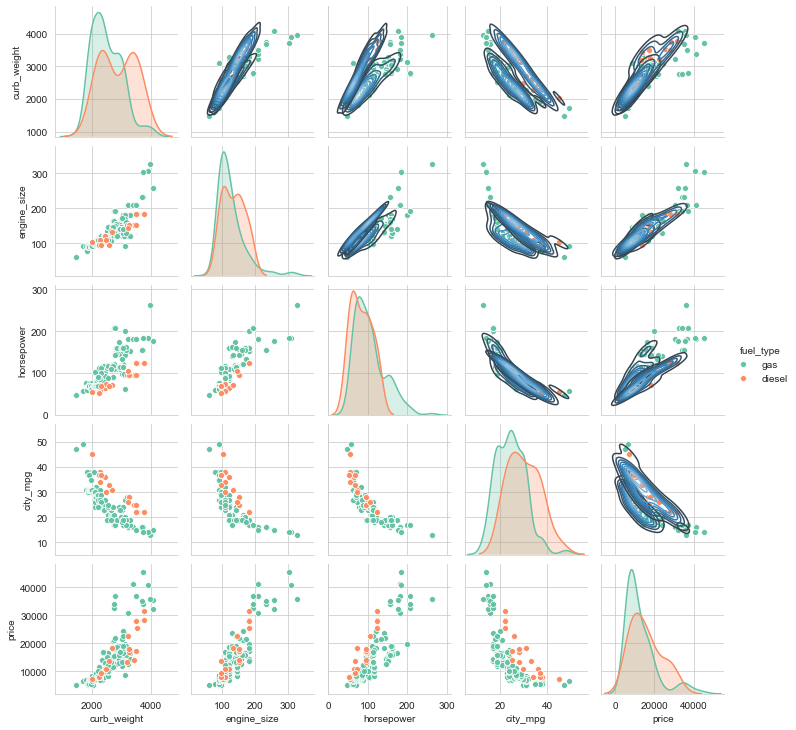

In [85]:
## Pair-wise Scatter Plots
num_cols = ["curb_weight", "engine_size", "horsepower", "city_mpg", "price", "fuel_type"] 
sns.pairplot(auto_prices[num_cols], hue='fuel_type', palette="Set2", diag_kind="kde", size=2)\
    .map_upper(sns.kdeplot, cmap="Blues_d")

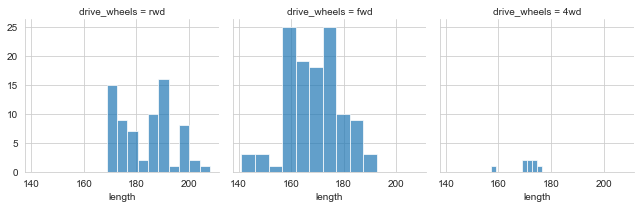

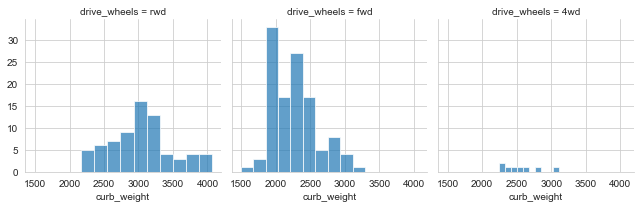

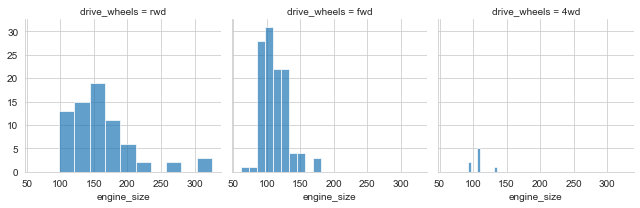

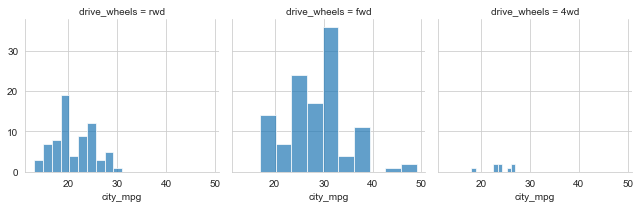

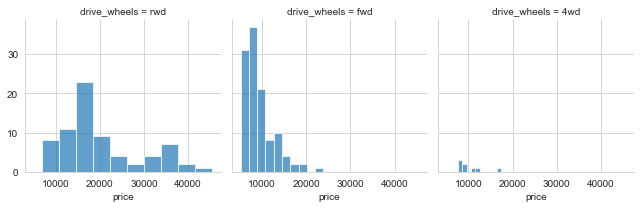

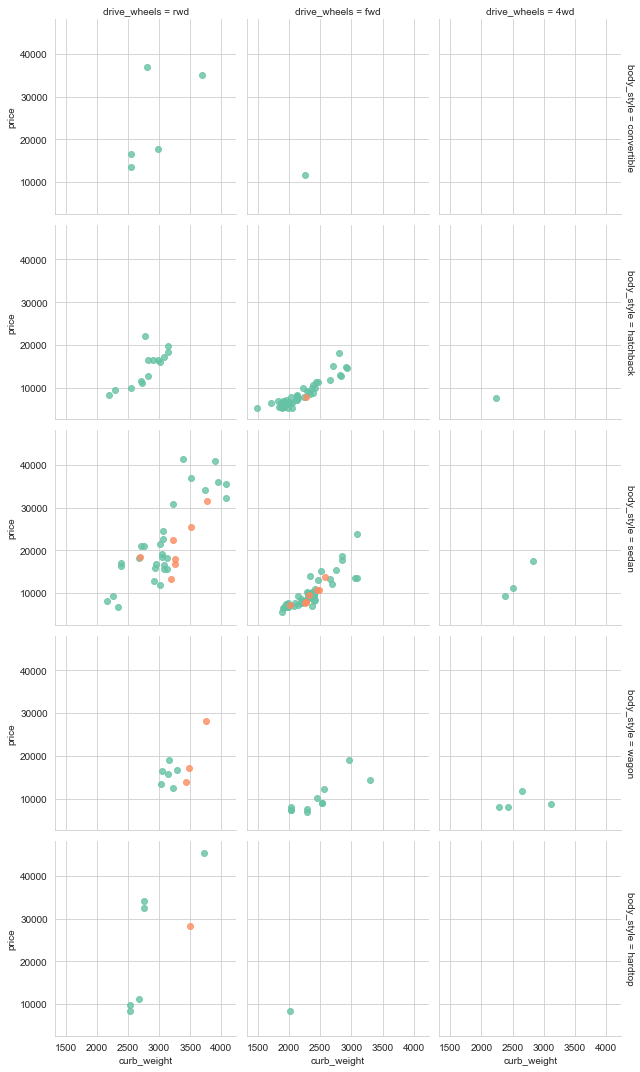

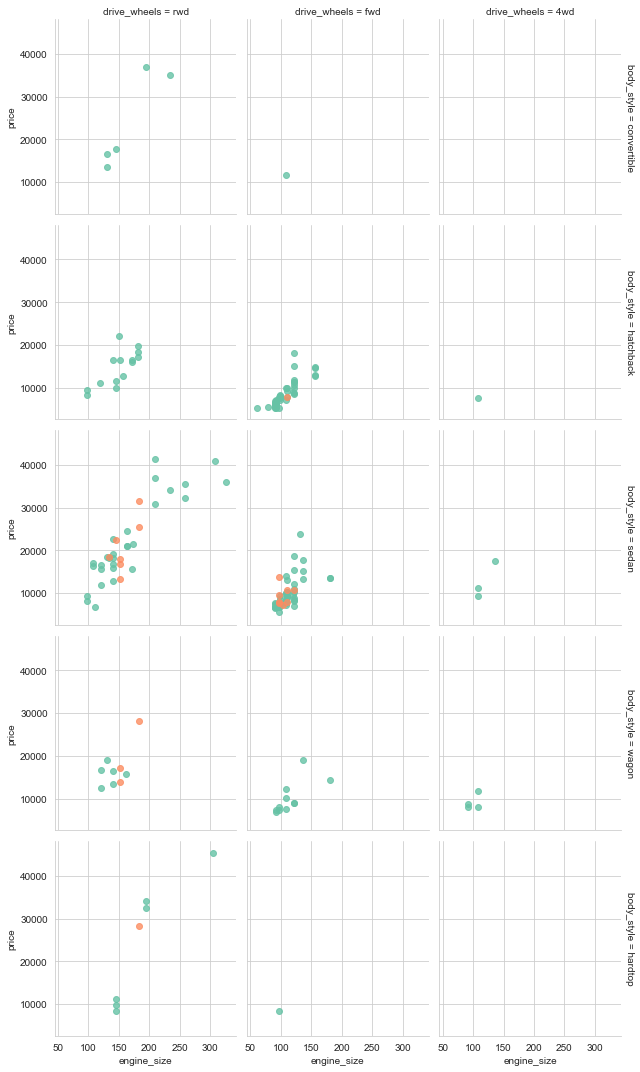

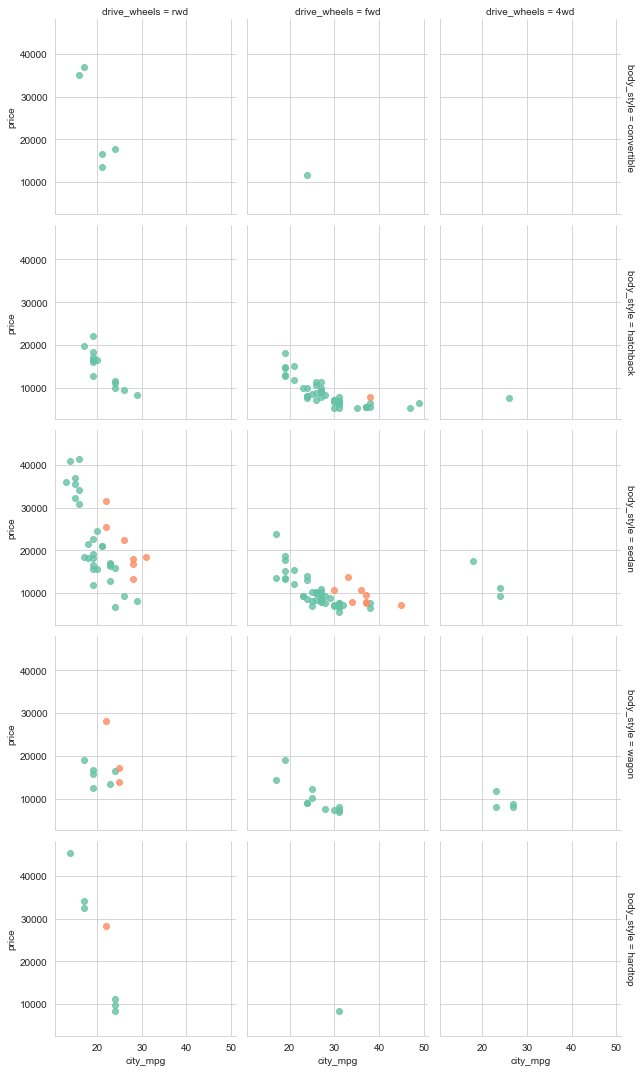

In [87]:
## Conditioned Plots

# Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col


# Function to plot conditioned scatter plots
def cond_plot(cols):
    import IPython.html.widgets
    for col in cols:
        g = sns.FacetGrid(auto_prices, col="drive_wheels", row = 'body_style', 
                      hue="fuel_type", palette="Set2", margin_titles=True)
        g.map(sns.regplot, col, "price", fit_reg = False)


# Define columns for making a conditioned histogram
plot_cols2 = ["length",
               "curb_weight",
               "engine_size",
               "city_mpg",
               "price"]
cond_hists(auto_prices, plot_cols2, 'drive_wheels')

# Define columns for making a conditioned scatter plot
num_cols = ["curb_weight", "engine_size", "city_mpg"]
cond_plot(num_cols) 

## Summary

Only by using multiple views with different plot types can you truely develop an understanding of relationships in complex data. A constant challenge in visualizing complex datasets is the limitation of 2d projections. Aesthetics and multiple axis methods allow projection of higher dimensions onto the 2d plot surface. 

1. Used summary statistics to understand the basics of a data set.
2. Used several types of plots to display distributions.
3. Created scatter plots with different transparency. 
4. Used density plots and hex bin plots to overcome overplotting. 
5. Applied aesthetics to project additional dimensions of categorical and numeric variables onto a 2d plot surface. 
6. Used pair-wise scatter plots and conditioned plots to create displays with multiple axes. 